In [1]:
# Dataframe operations - pandas

import pandas as pd

# Math Calculations

import numpy as np

# Plotting data - matplotlib

from matplotlib import pyplot as plt

# time series - statsmodels
# seasonality decompostion

from statsmodels.tsa.seasonal import seasonal_decompose

# holt winters
# single exponential smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# double and triple exponential smoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ignore harmless warnings

import warnings
warnings.filterwarnings('ignore')

(144, 1)
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


<AxesSubplot:title={'center':'Passengers Data'}, xlabel='Month'>

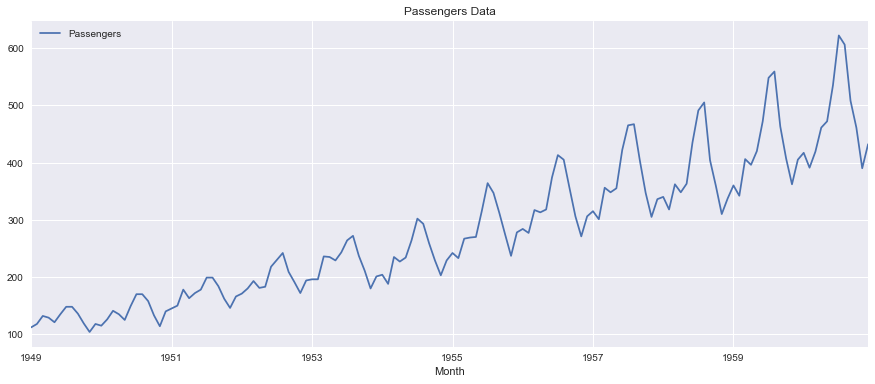

In [2]:
# Load the airline passenger data

airline = pd.read_csv(r"D:\iiit notes\Programming\AI\Internship practice\66 Session 03 -  Sep - 2021\AirPassengers.csv", index_col='Month', parse_dates=True)

# Finding shape of the dataframe

print(airline.shape)

# Having a look at the data

print(airline.head())

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Plotting the original data

airline[['Passengers']].plot(title='Passengers Data', figsize=(15,6))

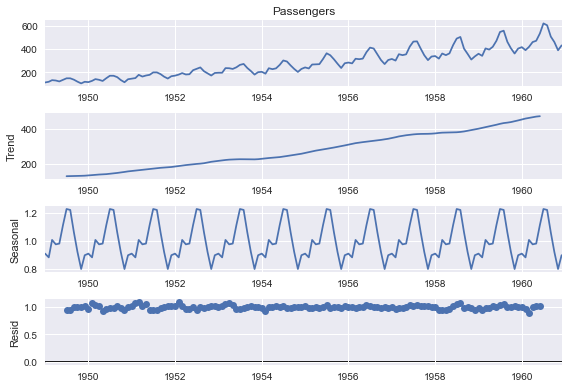

In [3]:
# Decomposing the Time Series and will look for levels, Trends and Seasonality in the data

decompose_result = seasonal_decompose(airline['Passengers'], model='multiplicative')
decompose_result.plot();

In [4]:
# Set the frequency of the date time index as Monthly start as indicated by the data

airline.index.freq = 'MS'

# Set the value of Alpha and define m (Time Period)

m = 12 # months 
alpha = 1/(2*m)

<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing'}, xlabel='Month'>

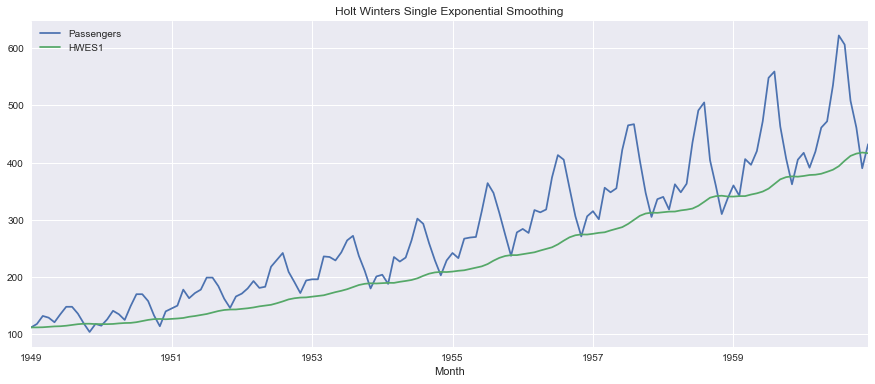

In [5]:
# Single Exponential Smoothing - Single HWES

airline['HWES1'] = SimpleExpSmoothing(airline['Passengers']).fit(smoothing_level=alpha,
                                                                optimized=False, use_brute=True).fittedvalues
airline[['Passengers', 'HWES1']].plot(title='Holt Winters Single Exponential Smoothing', figsize=(15,6))

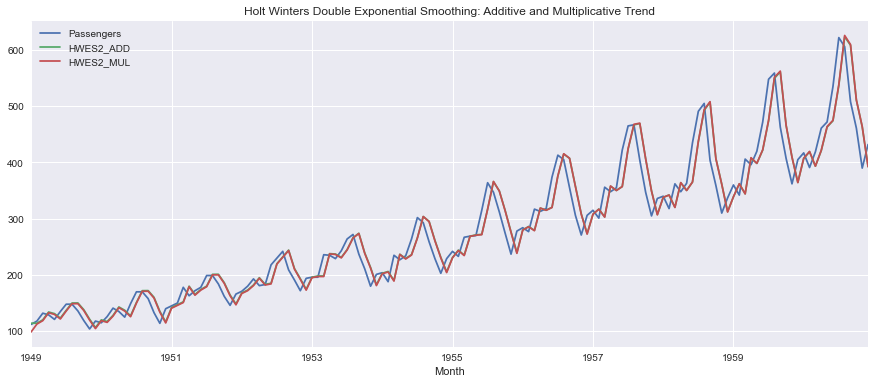

In [6]:
# Double ES, on both Additive and Multiplicative Trend 

airline['HWES2_ADD'] = ExponentialSmoothing(airline['Passengers'],trend='add').fit().fittedvalues 
airline['HWES2_MUL'] = ExponentialSmoothing(airline['Passengers'],trend='mul').fit().fittedvalues 
airline[['Passengers','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend', 
                                                     figsize=(15,6));

<AxesSubplot:title={'center':'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality'}, xlabel='Month'>

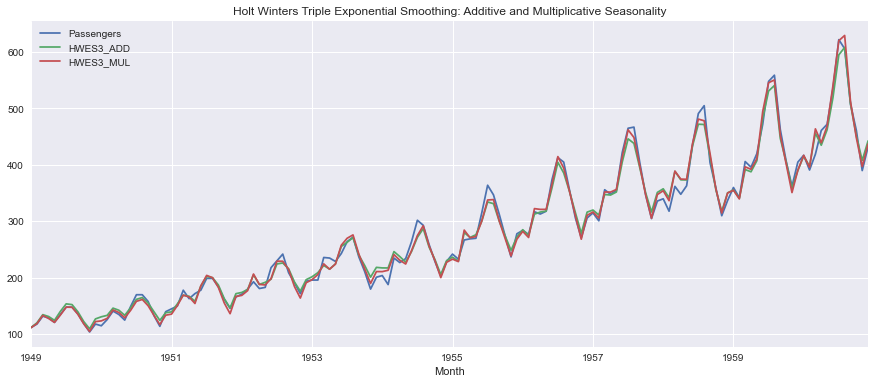

In [7]:
# Holt Winters Triple Exponential Smoothing (HWES) 

airline['HWES3_ADD'] = ExponentialSmoothing(airline['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues 
airline['HWES3_MUL'] = ExponentialSmoothing(airline['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues 
airline[['Passengers','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality', 
                                                     figsize=(15,6))

In [9]:
# Forecasting with Holt-Winters Exponential Smoothing (Triple ES) 
# 120 data points as Train set and the last 24 data points as Test Set. 

forecast_data = pd.read_csv(r"D:\iiit notes\Programming\AI\Internship practice\66 Session 03 -  Sep - 2021\AirPassengers.csv", index_col='Month', parse_dates=True) 

forecast_data.index.freq = 'MS' 

# Split into train and test set

train_airline = forecast_data[:120] 

test_airline = forecast_data[120:]

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

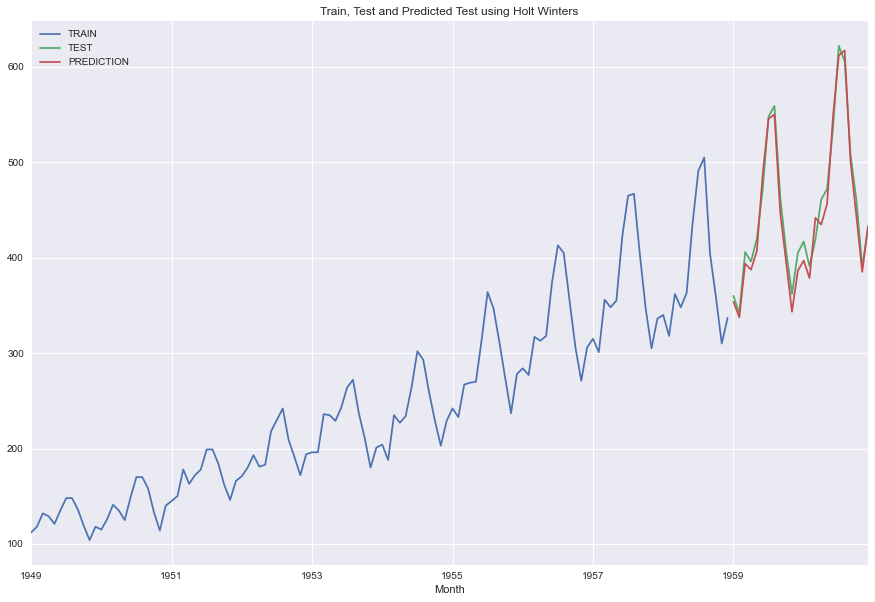

In [10]:
# Build the model and forecast 

fitted_model = ExponentialSmoothing(train_airline['Passengers'], trend='mul', seasonal='mul',seasonal_periods=12).fit() 
test_predictions = fitted_model.forecast(24) 

# Plot the chart

train_airline['Passengers'].plot(legend=True,label='TRAIN') 
test_airline['Passengers'].plot(legend=True,label='TEST',figsize=(15,10)) 
test_predictions.plot(legend=True,label='PREDICTION') 
plt.title('Train, Test and Predicted Test using Holt Winters')

<AxesSubplot:xlabel='Month'>

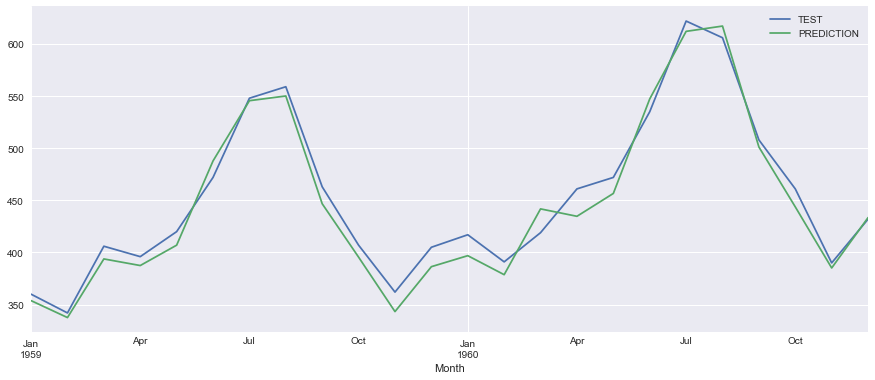

In [11]:
# Plot the prediction vs test data 

test_airline['Passengers'].plot(legend=True,label='TEST',figsize=(15,6)) 
test_predictions.plot(legend=True,label='PREDICTION',figsize=(15,6))

In [12]:
# Evaluation of performance metrics for time Series analysis 

from sklearn import metrics 

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(test_airline,test_predictions),3)) 
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(test_airline,test_predictions),3)) 
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(test_airline,test_predictions)),3)) 
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(test_airline,test_predictions),2)*100,'%') 
print('R2_score:', round(metrics.r2_score(test_airline,test_predictions),3))

Mean Absolute Error (MAE): 12.379
Mean Squared Error (MSE): 192.577
Root Mean Squared Error (RMSE): 13.877
Mean Absolute Percentage Error (MAPE): 3.0 %
R2_score: 0.965


# Claims Data (Series)